# Big Data Mart Sales Problem


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import seaborn as sns

In [3]:
df = pd.read_csv('Bigmart Train.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.shape

(8523, 12)

In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

we have missing values in 976 in itemweight and 1606 in outlet_size

missing values have one numeric column and another missing values column have categorical problem


In [8]:
df['Item_Weight'].mean()

12.857645184136183

In [9]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace = True)

In [10]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

null value of item weight is removed by the mean of the column

In [11]:
df['Outlet_Size']=df['Outlet_Size'].fillna(df.Outlet_Size.value_counts().index[0])

In [12]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

the null are removed now

In [13]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# EDA

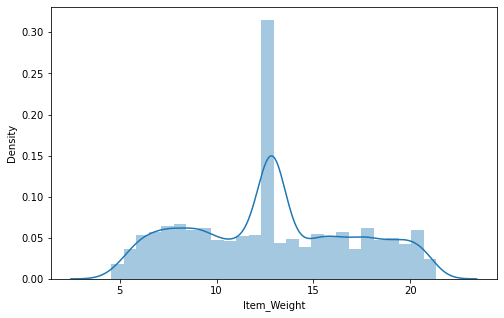

In [14]:
plt.figure(figsize=(8,5))
sns.distplot(df['Item_Weight'])
plt.show()

There are more item weight at 12 because of the mean values used to remove null values

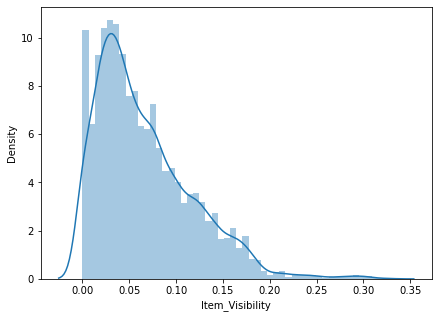

In [15]:
plt.figure(figsize=(7,5))
sns.distplot(df['Item_Visibility'])
plt.show()

skewness is present in item visibility

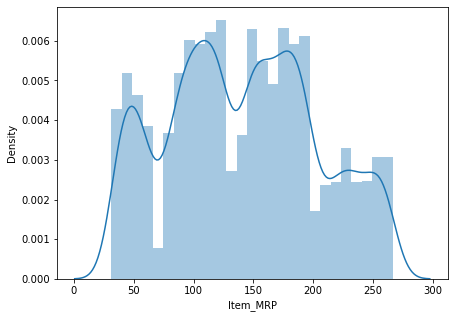

In [16]:
plt.figure(figsize=(7,5))
sns.distplot(df['Item_MRP'])
plt.show()


It is not a normal distributed data

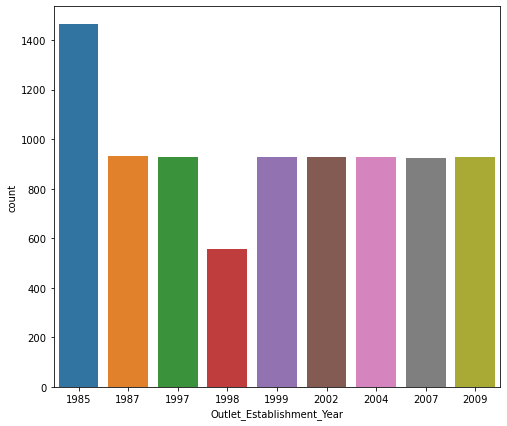

In [17]:
plt.figure(figsize=(8,7))
sns.countplot(x = 'Outlet_Establishment_Year',data = df)
plt.show()


This shows how many products are sold every year

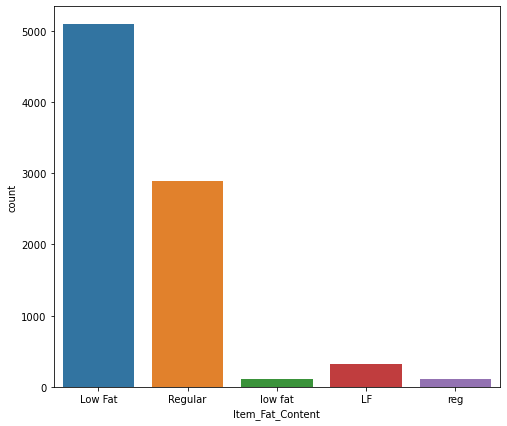

In [18]:
plt.figure(figsize=(8,7))
sns.countplot(x = 'Item_Fat_Content',data = df)
plt.show()

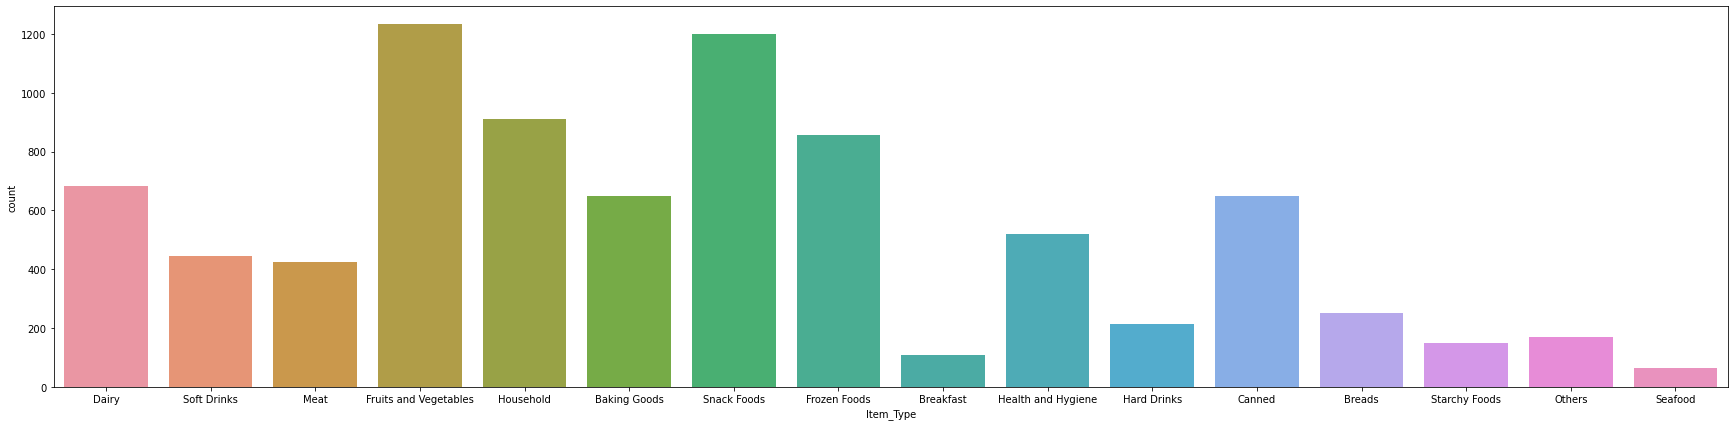

In [19]:
plt.figure(figsize=(30,7))
sns.countplot(x = 'Item_Type',data = df)
plt.show()


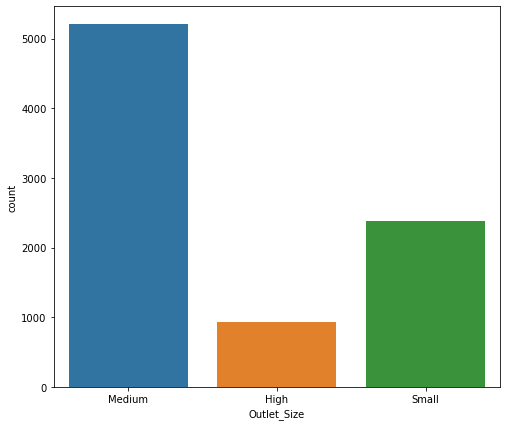

In [20]:
plt.figure(figsize=(8,7))
sns.countplot(x = 'Outlet_Size',data = df)
plt.show()

this shows there are more medium sized outlets present.

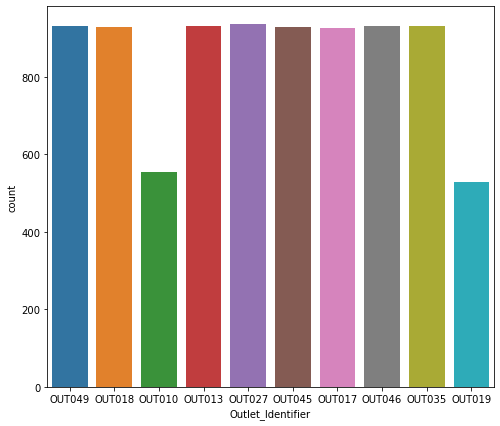

In [21]:
plt.figure(figsize=(8,7))
sns.countplot(x = 'Outlet_Identifier',data = df)
plt.show()

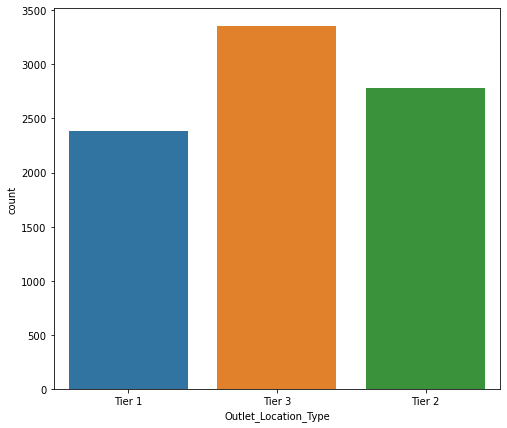

In [22]:
plt.figure(figsize=(8,7))
sns.countplot(x = 'Outlet_Location_Type',data = df)
plt.show()


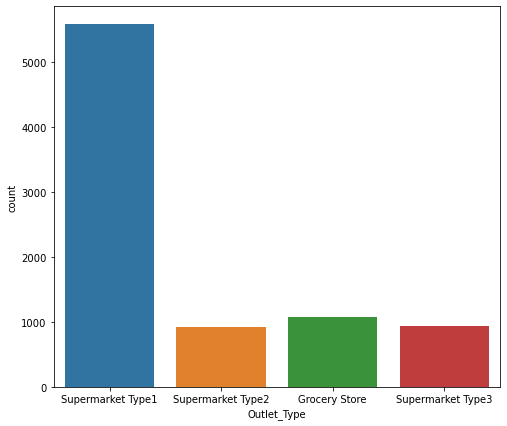

In [23]:
plt.figure(figsize=(8,7))
sns.countplot(x = 'Outlet_Type',data = df)
plt.show()


# Data Pre processing

In [24]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [25]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [26]:
df.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace = True)

In [27]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# Label Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [29]:
df['Item_Identifier'] = encoder.fit_transform(df['Item_Identifier'])
df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = encoder.fit_transform(df['Item_Type'])
df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])

In [30]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [31]:
df.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044518,-0.114660,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,0.001389,0.003656,-0.001178,0.002869
Item_Weight,0.044518,1.000000,-0.021157,-0.012049,0.028015,0.024756,-0.007975,-0.008301,-0.007225,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.114660,-0.021157,1.000000,0.047314,-0.139434,0.006063,0.000764,0.003151,-0.000622,-0.001598,0.002199,0.018719
Item_Visibility,-0.025482,-0.012049,0.047314,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,0.028015,-0.139434,-0.035249,1.000000,0.032651,0.001656,0.004970,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.024756,0.006063,-0.001315,0.032651,1.000000,0.003319,0.005020,0.006059,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007975,0.000764,-0.100439,0.001656,0.003319,1.000000,0.079035,0.504603,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,-0.008301,0.003151,-0.074834,0.004970,0.005020,0.079035,1.000000,0.193389,-0.089216,-0.122304,-0.049135
Outlet_Size,0.001389,-0.007225,-0.000622,0.069309,-0.001859,0.006059,0.504603,0.193389,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.003656,0.004088,-0.001598,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.614311,1.000000,0.467219,0.089367


<function matplotlib.pyplot.show(close=None, block=None)>

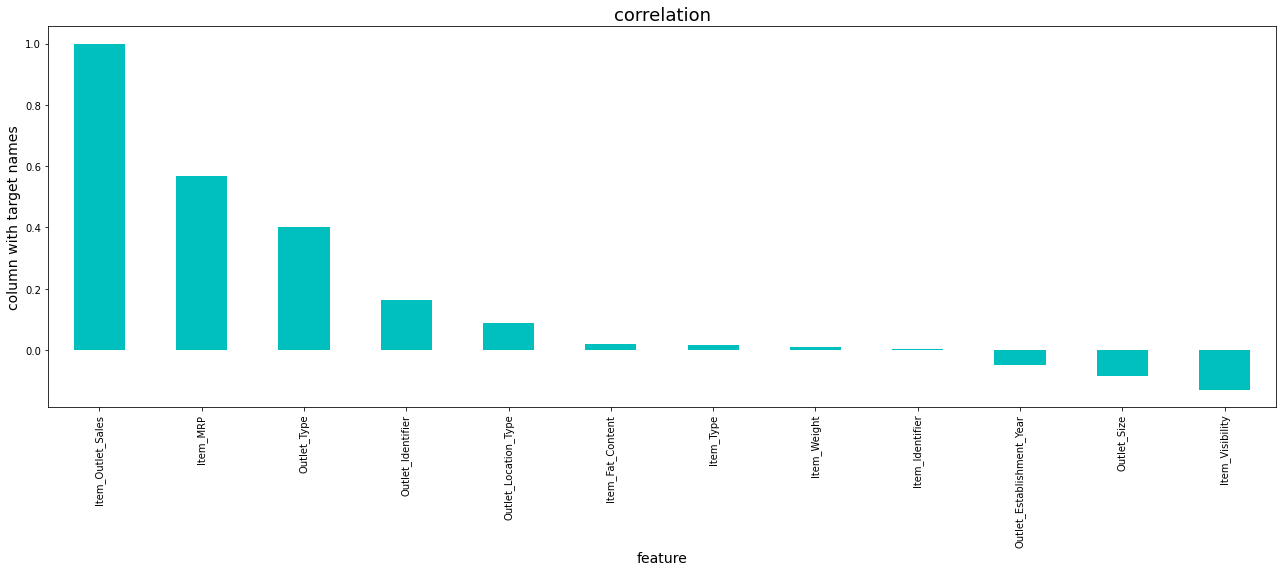

In [32]:
plt.figure(figsize=(22,7))
df.corr()['Item_Outlet_Sales'].sort_values(ascending=False).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show

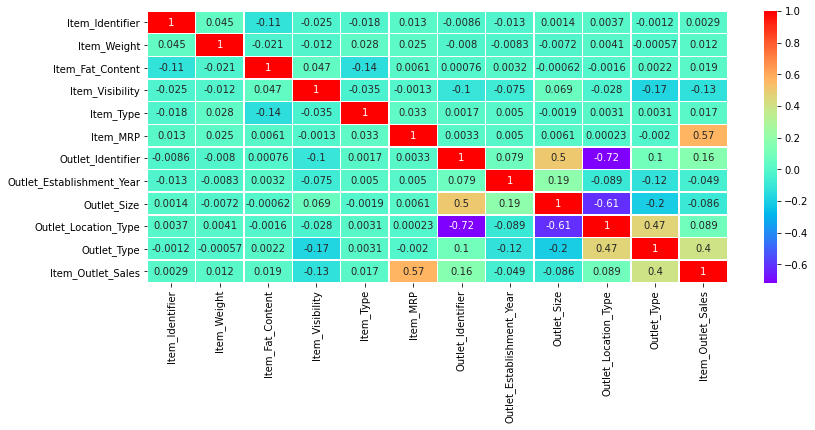

In [33]:
fig, ax = plt.subplots(figsize=(13,5))
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax, cmap='rainbow')
plt.show()

In [34]:
x = df.drop(columns = ['Item_Outlet_Sales'],axis = 1)
y = df['Item_Outlet_Sales']

In [35]:
x.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1


In [36]:
print(y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


In [37]:
x.skew

<bound method DataFrame.skew of       Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4 

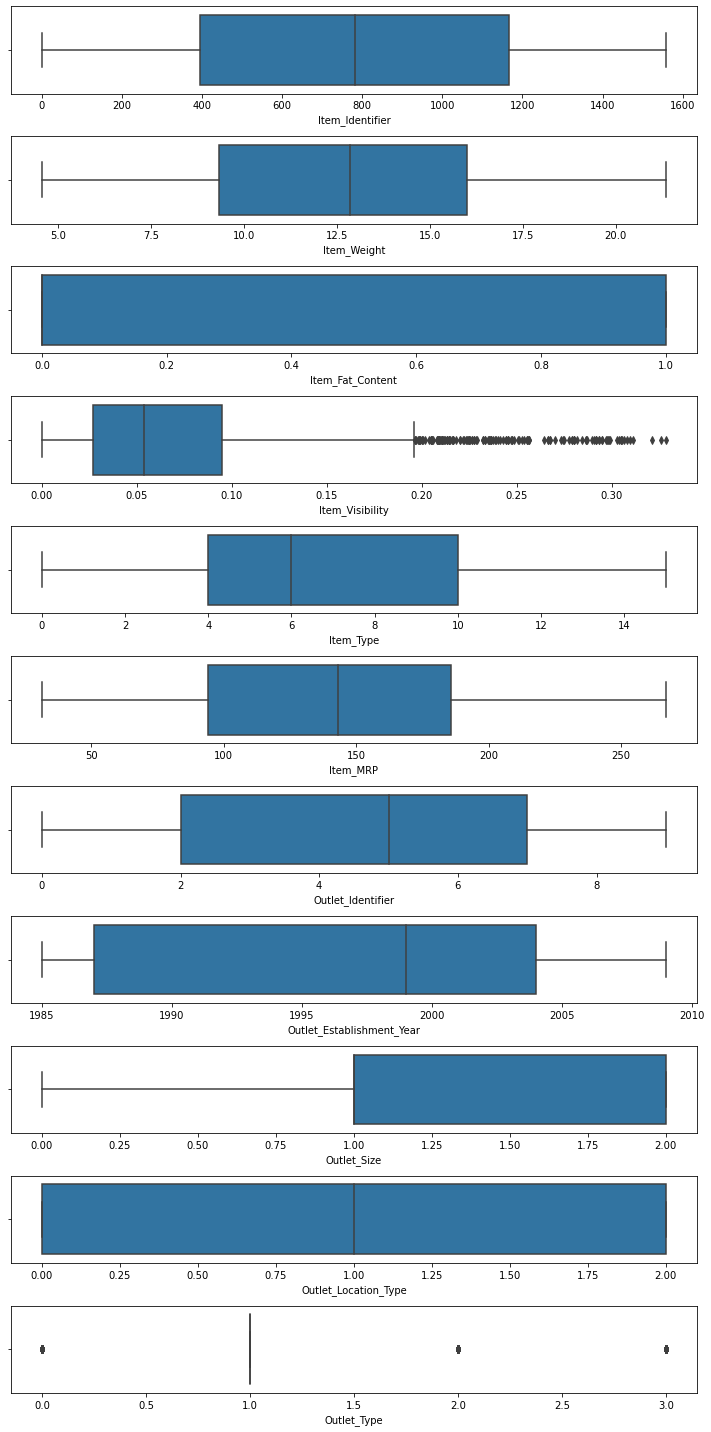

In [38]:
fig, axs = plt.subplots(11, figsize = (10,20))
plt1 = sns.boxplot(x['Item_Identifier'], ax = axs[0])
plt2 = sns.boxplot(x['Item_Weight'], ax = axs[1])
plt3 = sns.boxplot(x['Item_Fat_Content'], ax = axs[2])
plt4 = sns.boxplot(x['Item_Visibility'], ax = axs[3])
plt5 = sns.boxplot(x['Item_Type'], ax = axs[4])
plt6 = sns.boxplot(x['Item_MRP'], ax = axs[5])
plt7 = sns.boxplot(x['Outlet_Identifier'], ax = axs[6])
plt8 = sns.boxplot(x['Outlet_Establishment_Year'], ax = axs[7])
plt9 = sns.boxplot(x['Outlet_Size'], ax = axs[8])
plt10 = sns.boxplot(x['Outlet_Location_Type'], ax = axs[9])
plt11 = sns.boxplot(x['Outlet_Type'], ax = axs[10])
plt.tight_layout()


as we can see there are outliers

In [39]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x_new=pd.DataFrame(x_new,columns=x.columns)

In [40]:
x_new.skew

<bound method DataFrame.skew of       Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0           -1.461039    -0.822636         -0.738147        -1.146886   
1           -2.093858    -1.733801          1.354743        -1.037100   
2           -0.154018     1.086362         -0.738147        -1.122375   
3            0.773522     1.447728          1.354743        -1.745551   
4            1.098294    -0.917588         -0.738147        -1.745551   
...               ...          ...               ...              ...   
8518        -0.844393    -1.468096         -0.738147         0.020310   
8519         0.338073    -1.060659          1.354743        -0.221388   
8520         1.206073    -0.496556         -0.738147        -0.542979   
8521        -0.112559    -1.373443          1.354743         1.459990   
8522        -1.862457     0.491786         -0.738147        -0.276195   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0     -0.712347 

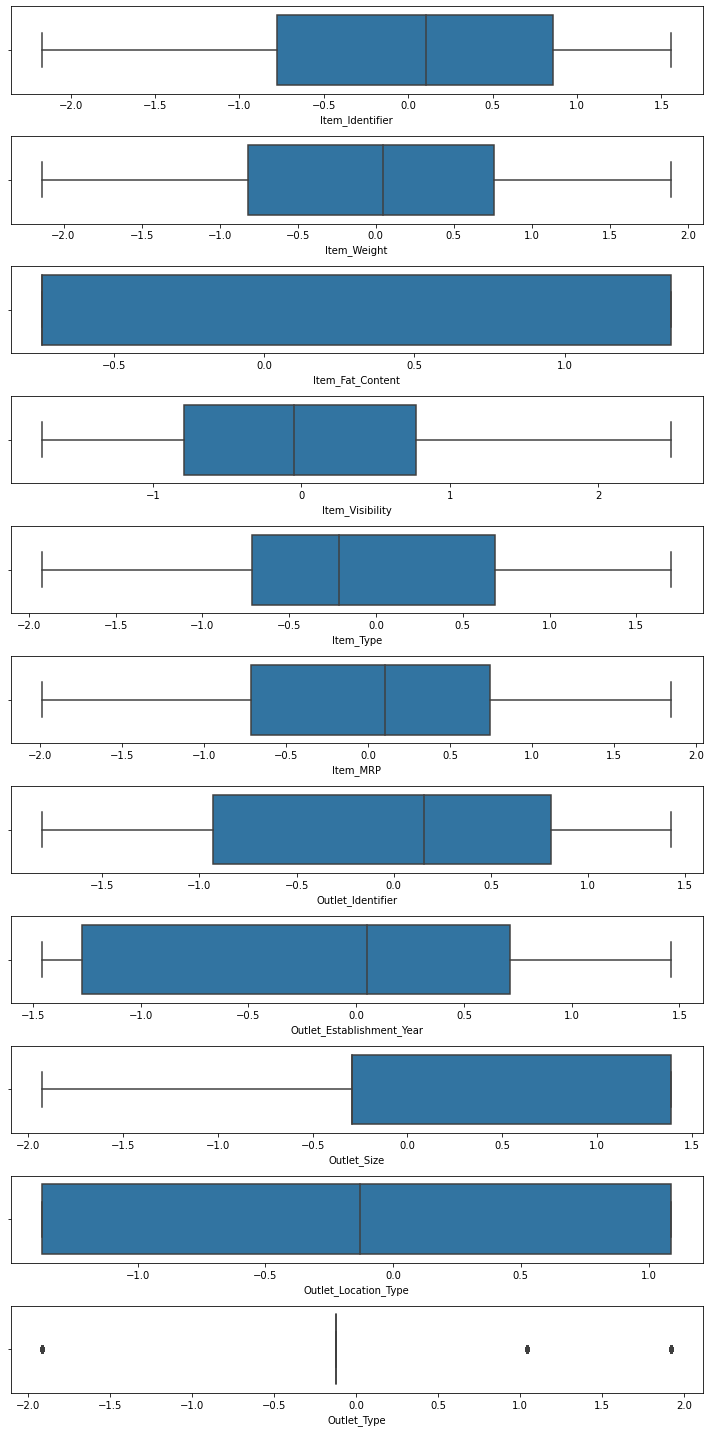

In [41]:
fig, axs = plt.subplots(11, figsize = (10,20))
plt1 = sns.boxplot(x_new['Item_Identifier'], ax = axs[0])
plt2 = sns.boxplot(x_new['Item_Weight'], ax = axs[1])
plt3 = sns.boxplot(x_new['Item_Fat_Content'], ax = axs[2])
plt4 = sns.boxplot(x_new['Item_Visibility'], ax = axs[3])
plt5 = sns.boxplot(x_new['Item_Type'], ax = axs[4])
plt6 = sns.boxplot(x_new['Item_MRP'], ax = axs[5])
plt7 = sns.boxplot(x_new['Outlet_Identifier'], ax = axs[6])
plt8 = sns.boxplot(x_new['Outlet_Establishment_Year'], ax = axs[7])
plt9 = sns.boxplot(x_new['Outlet_Size'], ax = axs[8])
plt10 = sns.boxplot(x_new['Outlet_Location_Type'], ax = axs[9])
plt11 = sns.boxplot(x_new['Outlet_Type'], ax = axs[10])
plt.tight_layout()

# Model Building 

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.preprocessing import scale
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import RidgeCV,LassoCV
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=0)

In [47]:
x.shape,x_train.shape,x_test.shape

((8523, 11), (6818, 11), (1705, 11))

In [48]:
lm = LinearRegression()
lr = Lasso()
ri = Ridge()
rf = RandomForestRegressor()

In [49]:
models = LinearRegression(),Ridge(),Lasso(), RandomForestRegressor()

In [50]:
maelist=[]
mselist=[]
rmselist=[]
r2list=[]
def create_model(model):
    m=model
    m.fit(x_train,y_train)
    p=m.predict(x_test)
    
    mae=mean_absolute_error(p,y_test)
    mse=mean_squared_error(p,y_test)
    rmse=np.sqrt(mean_squared_error(p,y_test))
    r2=r2_score(y_test,p)
    
    maelist.append(mae)
    mselist.append(mse)
    rmselist.append(rmse)
    r2list.append(r2)
    
    print(m)
    print('Mean absolute error',mae)
    print('Mean squared error',mse)
    print('Root Mean squared error',rmse)
    print('R2 Score',r2)
    print('---------------------------------------------------------------------------------------------------------')

In [51]:
for i in models:
    create_model(i)

LinearRegression()
Mean absolute error 910.2903061580674
Mean squared error 1425436.534339857
Root Mean squared error 1193.916468744718
R2 Score 0.5129808734222494
---------------------------------------------------------------------------------------------------------
Ridge()
Mean absolute error 910.2518734527093
Mean squared error 1425429.9016138318
Root Mean squared error 1193.9136910236987
R2 Score 0.5129831395802703
---------------------------------------------------------------------------------------------------------
Lasso()
Mean absolute error 910.2748629141712
Mean squared error 1425780.7257968283
Root Mean squared error 1194.0606039045206
R2 Score 0.5128632758872407
---------------------------------------------------------------------------------------------------------
RandomForestRegressor()
Mean absolute error 820.3774544
Mean squared error 1333602.085205661
Root Mean squared error 1154.8169054900698
R2 Score 0.5443573199560812
--------------------------------------------

In [52]:
print('Minimum Mean Absolute error is shown by ',models[maelist.index(min(maelist))],min(maelist))
print('Minimum Mean squared error is shown by ',models[mselist.index(min(mselist))],min(mselist))
print('Minimum Root Mean squared error is shown by ',models[rmselist.index(min(rmselist))],min(rmselist))
print('Maximun R2 Score is shown by ',models[r2list.index(max(r2list))],max(r2list))

Minimum Mean Absolute error is shown by  RandomForestRegressor() 820.3774544
Minimum Mean squared error is shown by  RandomForestRegressor() 1333602.085205661
Minimum Root Mean squared error is shown by  RandomForestRegressor() 1154.8169054900698
Maximun R2 Score is shown by  RandomForestRegressor() 0.5443573199560812


In [60]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

In [61]:
model=RandomForestRegressor()
param_grid={ 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }
regression=GridSearchCV(model,param_grid,cv=10)

In [62]:
regression.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30]})

In [63]:
rf=regression.best_estimator_
print(rf)

RandomForestRegressor(max_features='log2', min_samples_split=8, n_estimators=30)


In [64]:
rf=regression.best_params_
print(rf)

{'bootstrap': True, 'max_features': 'log2', 'min_samples_split': 8, 'n_estimators': 30}


In [65]:
rf=regression.best_score_
print(rf)

0.5785788888696634


In [66]:
rf=regression.predict(x_test)

In [67]:
mae=mean_absolute_error(rf,y_test)
mse=mean_squared_error(rf,y_test)
rmse=np.sqrt(mean_squared_error(rf,y_test))
r2=r2_score(y_test,rf)

In [68]:
print('Mean absolute error',mae)
print('Mean squared error',mse)
print('Root Mean squared error',rmse)
print('R2 Score',r2)

Mean absolute error 789.9975172791876
Mean squared error 1231238.2306657855
Root Mean squared error 1109.6117477143912
R2 Score 0.5793312762355376
